In [19]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('./data/Income1.csv')

数据预处理

In [11]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [12]:
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

# 分解写法

In [13]:
w = torch.randn(1,requires_grad = True)
b = torch.zeros(1,requires_grad = True)

模型的公式: w @ x + b

In [14]:
learning_rate = 0.0001

In [15]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_pred = torch.matmul(x,w) + b
        loss = (y - y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= w.grad.data*learning_rate
            b.data -= b.grad.data*learning_rate

In [16]:
w

tensor([4.9743], requires_grad=True)

In [17]:
b

tensor([-28.3639], requires_grad=True)

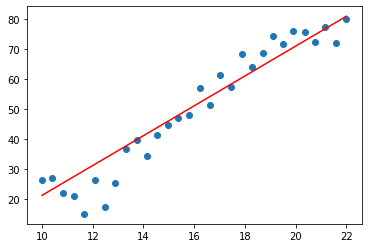

In [20]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),(w*X + b).data.numpy(),c='r')